In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [58]:
def display(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

In [197]:
reeses = cv2.imread("Downloads/Computer-Vision-with-Python/DATA/reeses_puffs.png",0)
cereals = cv2.imread("Downloads/Computer-Vision-with-Python/DATA/many_cereals.jpg",0)
reeses = cv2.rotate(reeses, cv2.ROTATE_90_COUNTERCLOCKWISE)

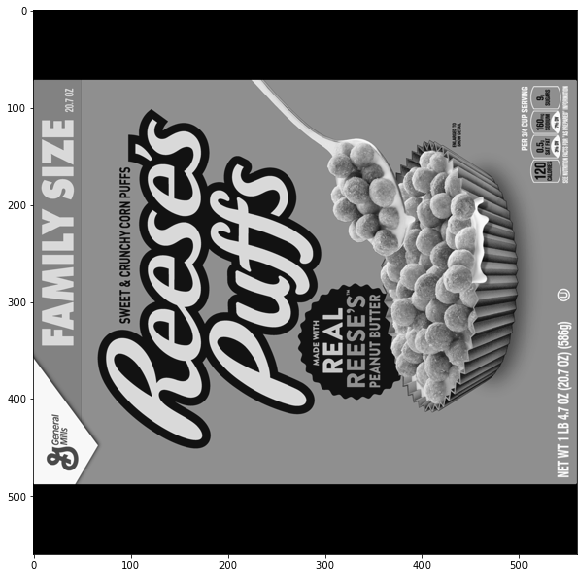

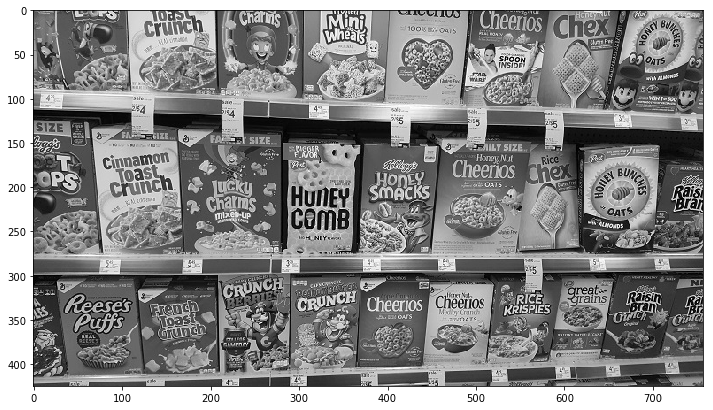

In [198]:
display(reeses)
display(cereals)

In [199]:
#scale invarient feature transform
sift = cv2.xfeatures2d.SIFT_create()

In [200]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [201]:
#bruteforce
bf = cv2.BFMatcher()

In [202]:
matches = bf.knnMatch(des1, des2, k=2)

In [203]:
good = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [204]:
len(good)

71

In [205]:
len(matches)

1515

In [206]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 2)

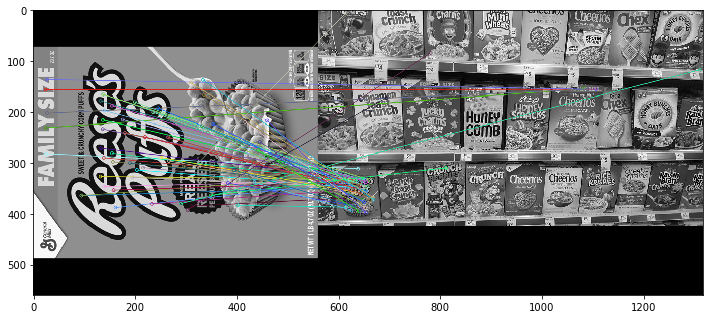

In [207]:
display(sift_matches)

In [208]:
sift = cv2.xfeatures2d.SIFT_create()

In [209]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [210]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [211]:
#fast library for approximate nearest neighbors
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [212]:
matches = flann.knnMatch(des1, des2, k=2)

In [213]:
# matches
matchesMask = [[0,0] for i in range(len(matches))]
# matchesMask

In [214]:
# good = []

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1, 0]
#         good.append([match1])

In [215]:
draw_params = dict(matchColor = (0, 255, 0),
                  singlePointColor = (0,0,255),
                  matchesMask = matchesMask,
                  flags = 0)

In [216]:
len(good)

71

In [217]:
len(matches)

1515

In [218]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

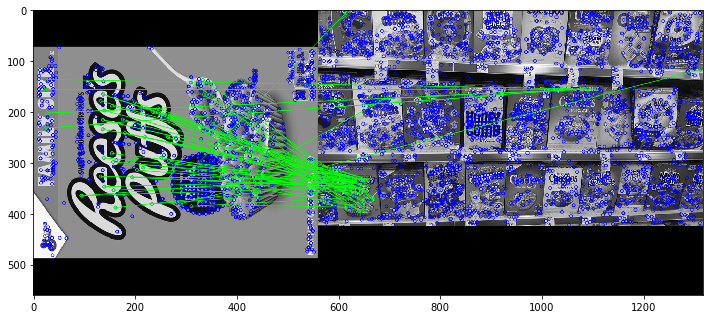

In [219]:
display(flann_matches)

In [223]:
num_plates = cv2.imread("Downloads/Computer-Vision-with-Python/DATA/many_num_plates.png",0)
num_plate = cv2.imread("Downloads/Computer-Vision-with-Python/DATA/num_plate1.png",0)

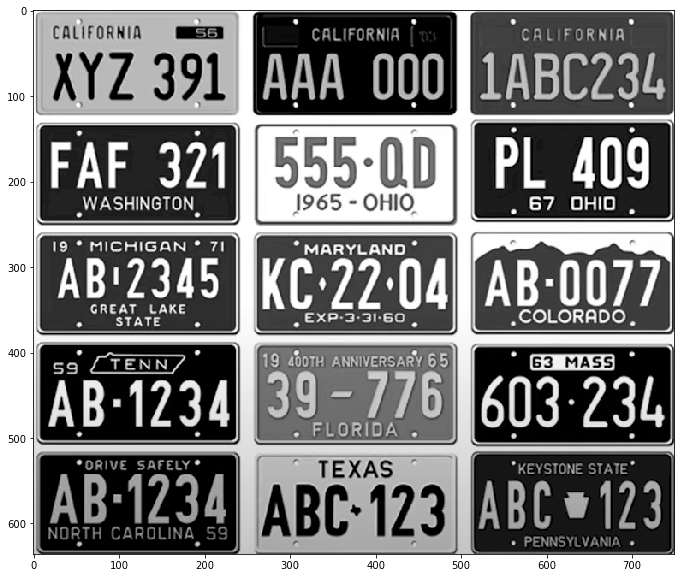

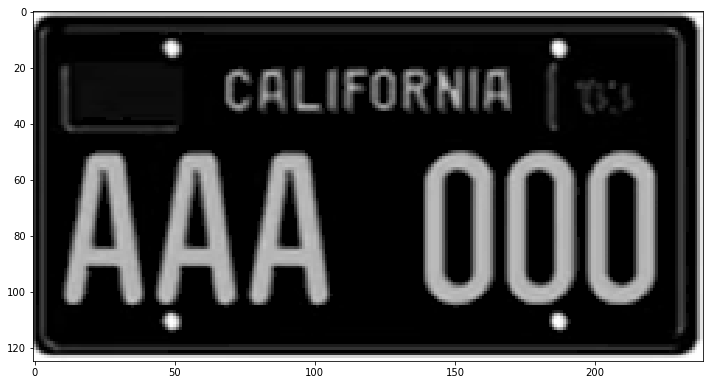

In [224]:
display(num_plates)
display(num_plate)

In [225]:
sift = cv2.xfeatures2d.SIFT_create()

In [226]:
kp1, des1 = sift.detectAndCompute(num_plate, None)
kp2, des2 = sift.detectAndCompute(num_plates, None)

In [227]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [228]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [229]:
matchesMask = [[0,0] for i in range(len(matches))]

In [230]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1, 0]

In [231]:
draw_params = dict(matchColor = (0, 255, 0),
                  singlePointColor = (0,0,255),
                  matchesMask = matchesMask,
                  flags = 0)

In [232]:
flann_matches = cv2.drawMatchesKnn(num_plate, kp1, num_plates, kp2, matches, None, **draw_params)

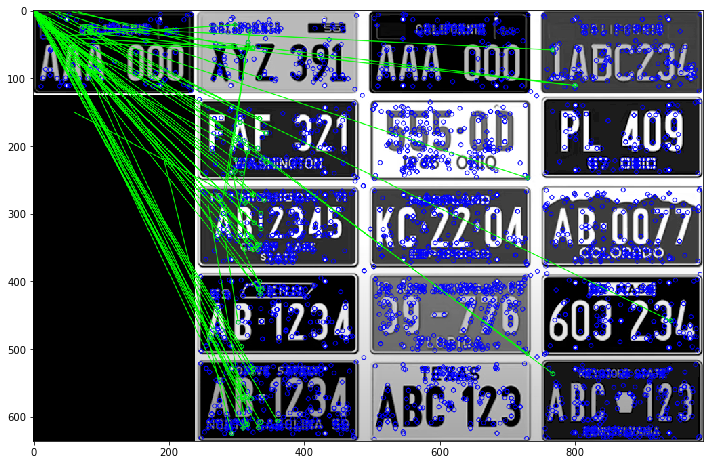

In [233]:
display(flann_matches)